<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_2_Z_score_e_Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baixando o pacote que permite buscar datasets diretamente do repositório UCI

In [1]:
pip install ucimlrepo

Importação das bibliotecas para cálculos numéricos, gráficos, estatística e manipulação de dados.

In [2]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

# A
Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

## Cardiotocography

Campos, D. & Bernardes, J. (2000). Cardiotocography [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51S4N.

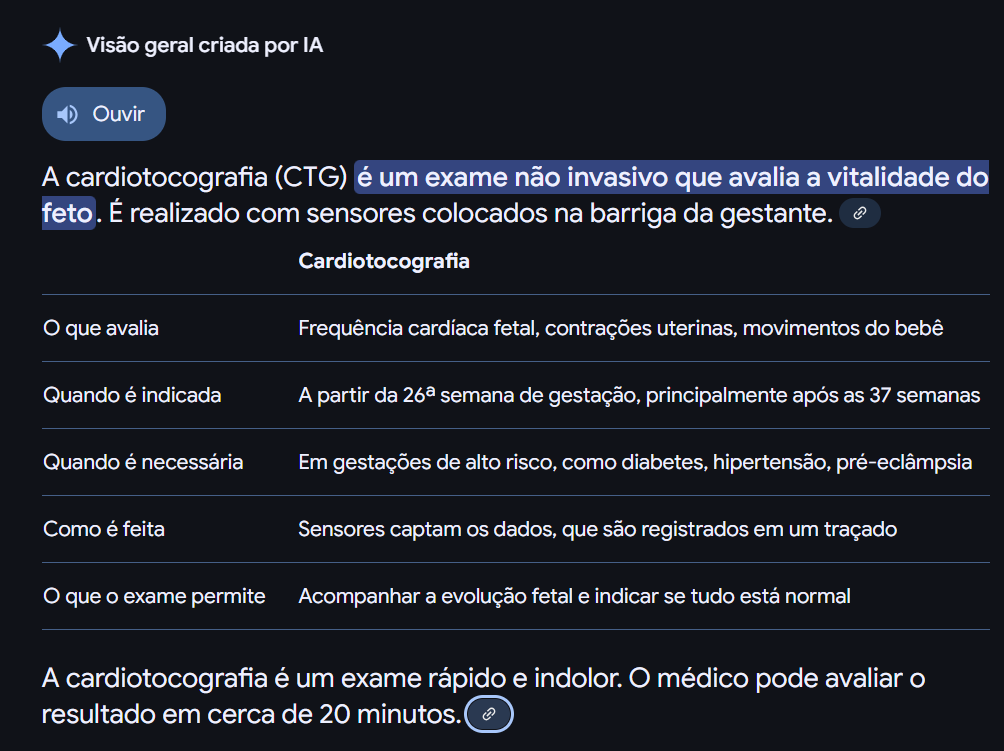

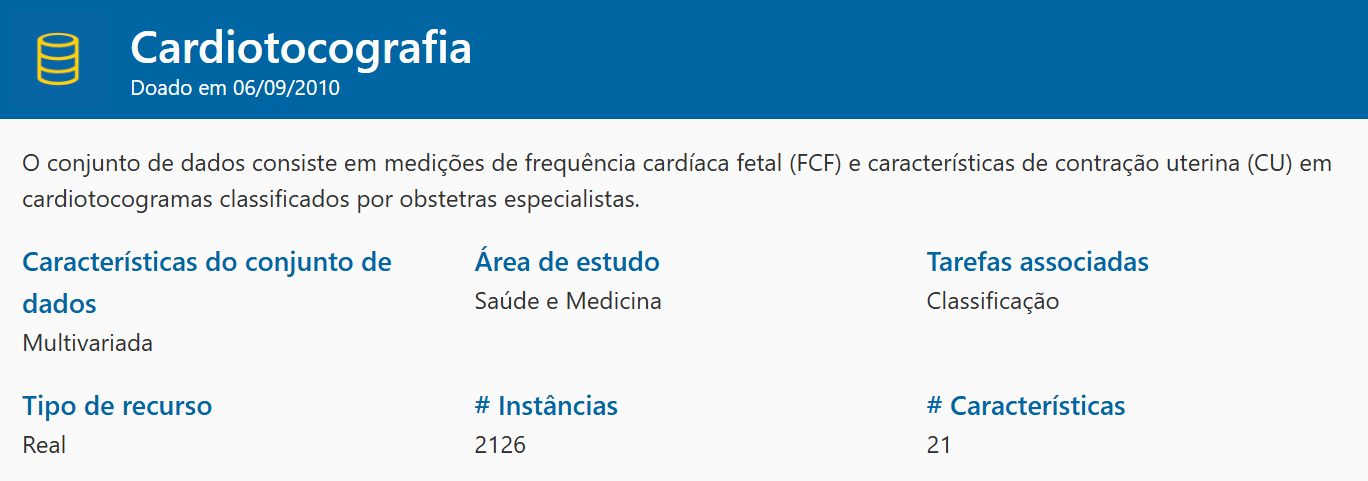

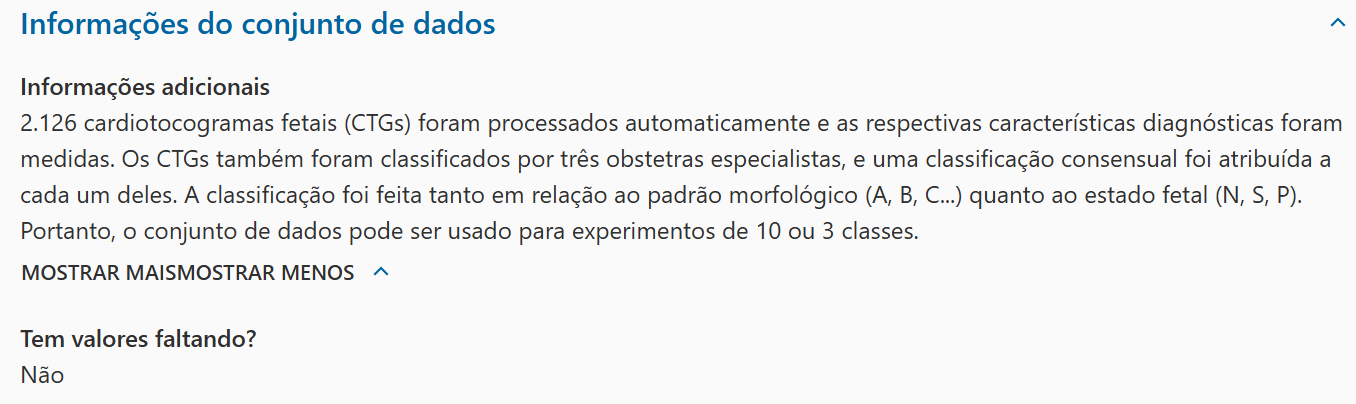

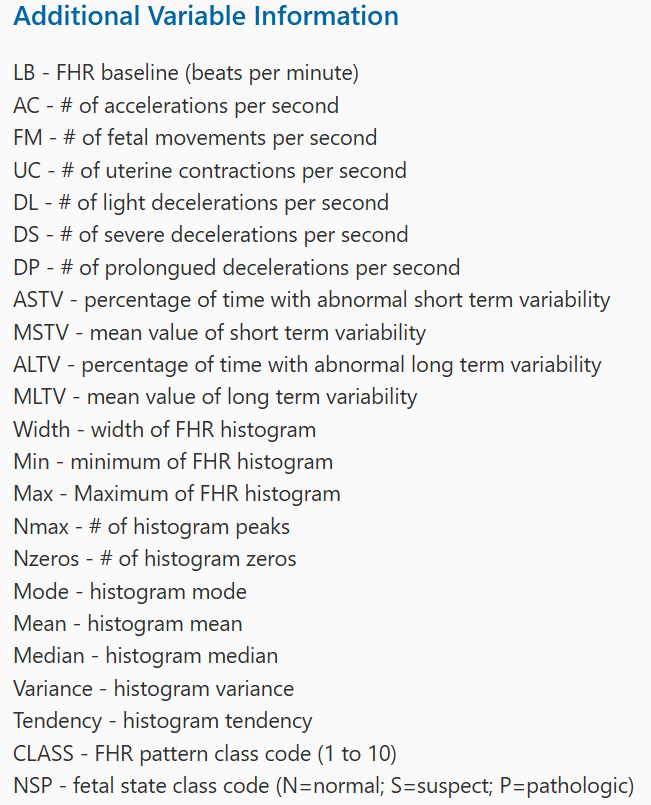

In [3]:
# Busca o dataset
cardiotocography = fetch_ucirepo(id=193)

# Guarda as features e as classes em dataframe
df_features = cardiotocography.data.features
df_class = cardiotocography.data.targets

# Junta as features e as classes em um unico dataframe
df = pd.concat([df_features, df_class], axis=1)

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


In [5]:
df['LB'].unique()

array([120, 132, 133, 134, 122, 151, 150, 131, 130, 129, 128, 124, 115,
       114, 116, 158, 156, 148, 149, 146, 144, 142, 136, 141, 138, 140,
       154, 145, 139, 125, 123, 159, 143, 119, 121, 127, 126, 118, 135,
       137, 147, 157, 117, 152, 112, 106, 110, 160])

In [6]:
df['AC'].unique()

array([0.   , 0.006, 0.003, 0.007, 0.001, 0.005, 0.009, 0.002, 0.008,
       0.004, 0.01 , 0.015, 0.013, 0.014, 0.011, 0.017, 0.012, 0.016,
       0.019, 0.018])

Há um desequilibrio de classes já que temos bem mais amostras de 1.

In [7]:
df['NSP'].value_counts()

,count
NSP,
1,1655
2,295
3,176


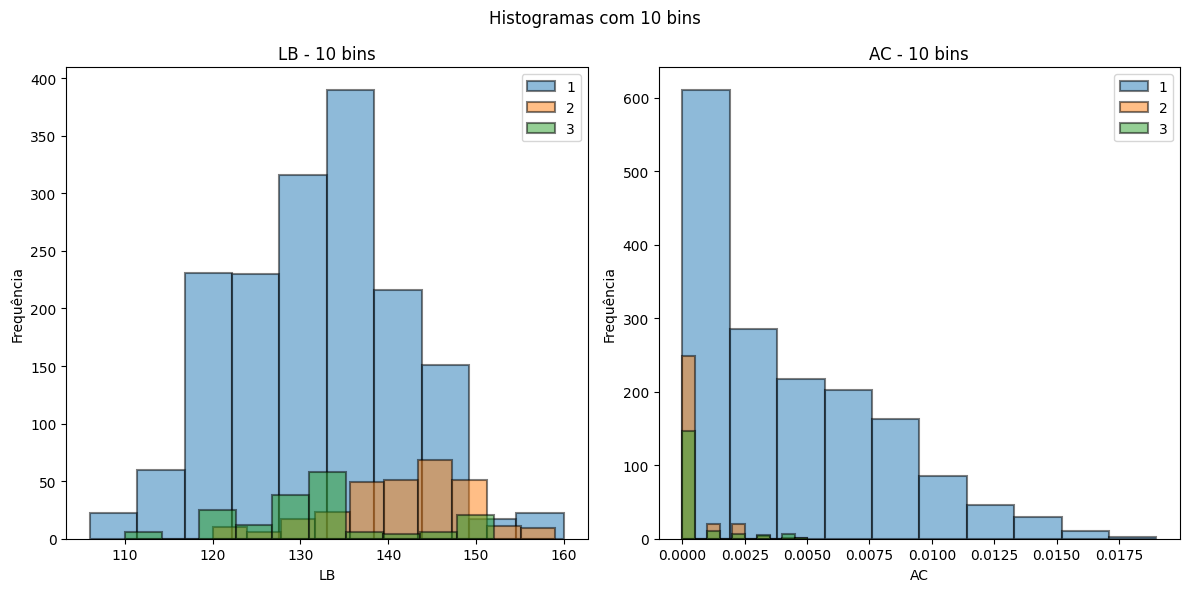

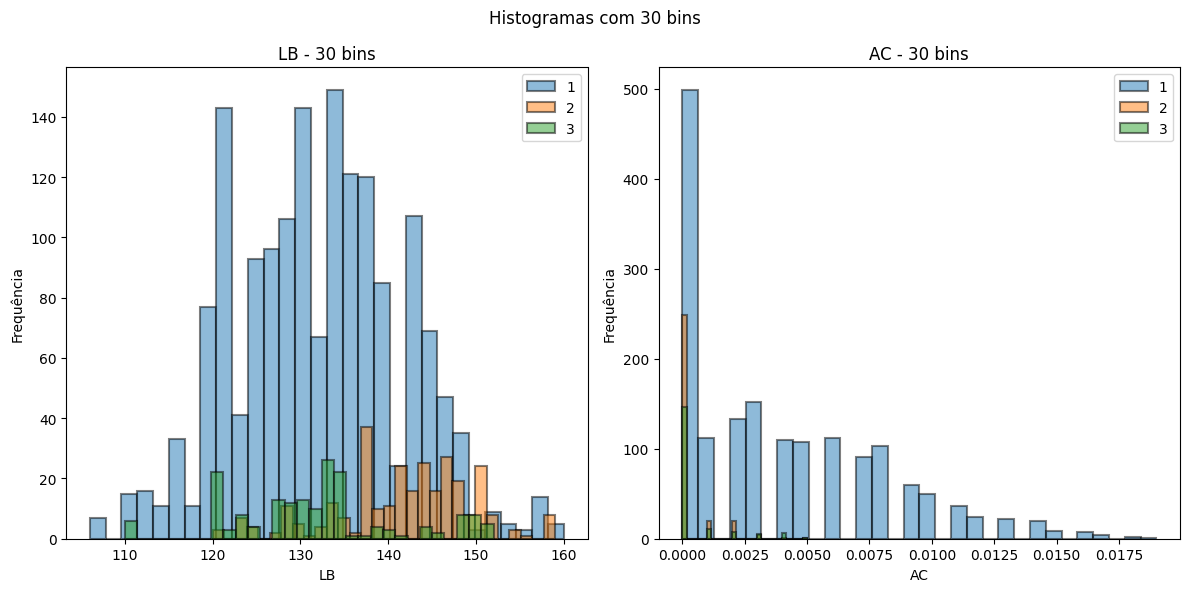

In [8]:
features = ['LB', 'AC']

bins_list = [10, 30]

for bins in bins_list:
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(features):
        plt.subplot(1, 2, i+1)
        for classe in sorted(df['NSP'].unique()):
            plt.hist(df[df['NSP'] == classe][feature], bins=bins, alpha=0.5, label=classe, linewidth=1.5, edgecolor='black')
        plt.title(f'{feature} - {bins} bins')
        plt.xlabel(feature)
        plt.ylabel('Frequência')
        plt.legend()
    plt.suptitle(f'Histogramas com {bins} bins')
    plt.tight_layout()
    plt.show()


1. O dataset possui bem mais amostras de 1 do que das outras classes. Isso pode ser um problema na hora de treinar e/ou testar o modelo.
Além de que ele pode não aprender bem as características das classes com menos exemplos.

2. Nos histogramas das duas features escolhidas as classes tem grande sobreposição, logo essas features sozinhas não são suficientes para separar as classes com clareza. Em outras palavras elas compartilham valores similares para aquela feature.

3. É provavel que essas duas features escolhidas não sejam boas para usar em um modelo de classificação.

* Classes bem separadas ---> Feature é muito útil para o modelo.
* Classes com grande sobreposição ---> Feature é pouco informativa para distinguir.
* Classes com sobreposição parcial ---> Pode ser útil, combinada com outras features.

4. Usando um bin de 10 conseguimos ver a tendencia geral das features (qual sua provavel distribuição) mas perdemos os detalhes.

5. Já usando um bin de 30 conseguimos ver mais detalhes mas para as classes que tem poucas amostras a visualização piora.

# B

Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.

Use uma função de Python e uma tabela para obter os valores de probabilidade.

 **Simulando 100 dados artificiais com base no padrão real da variável LB para a classe 1 no dataset original**

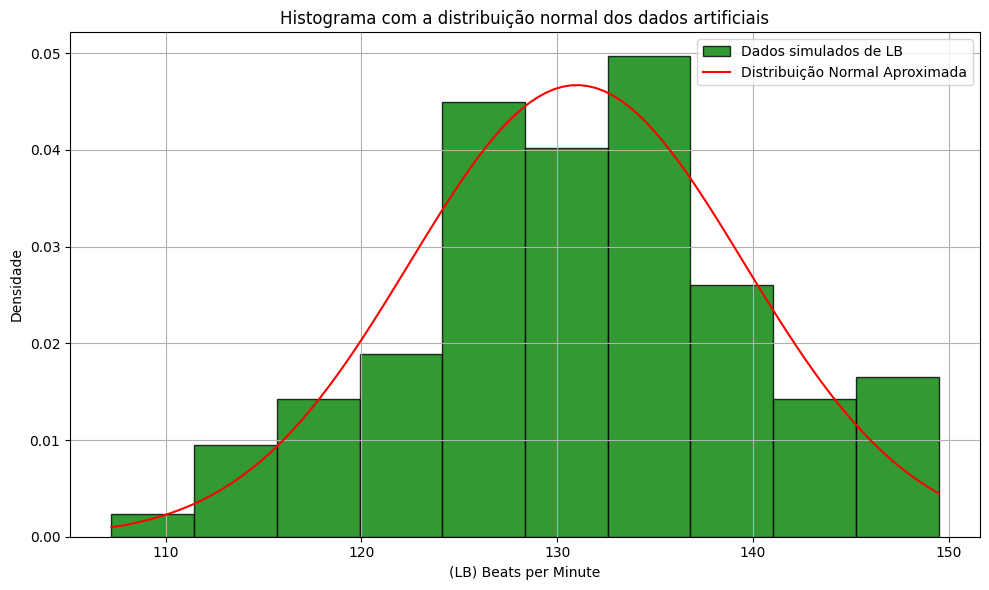

In [9]:
# Filtra a feature 'LB' onde a classe 'NSP' for 1 (normal)
acc_per_sec_normal = df[df['NSP'] == 1]['LB']

# Calcula a média e o desvio padrão dos dados reais filtrados
mean_real = np.mean(acc_per_sec_normal)
std_real = np.std(acc_per_sec_normal)

# Define a seed de geração de numeros aleatorios
# Serve para fixar a aleatoriedade, garantindo que o resultado dos números aleatórios seja sempre o mesmo toda vez que o código for executado.
np.random.seed(42)
# Quantidade de amostras
n_samples = 100
# Geração dos dados artificiais com distribuição normal com base nos dados reais
dados_artificiais = np.random.normal(loc=mean_real, scale=std_real, size=n_samples)

# Ajusta os dados simulados para obter média e desvio padrão estimados
mu, sigma = norm.fit(dados_artificiais)

# Nova figura de tamanho 10x6 polegadas
plt.figure(figsize=(10, 6))

# Plota o histograma dos dados simulados (normalizado)
plt.hist(dados_artificiais, bins=10, density=True, alpha=0.8, color='g', label='Dados simulados de LB', edgecolor='black')

# Plota a curva da distribuição normal ajustada

# cria 100 pontos igualmente espaçados entre o menor e maior valor dos dados simulados.
x = np.linspace(min(dados_artificiais), max(dados_artificiais), 100)
# calcula a função de densidade de probabilidade para esses x com a média e o desvio ajustados.
pdf = norm.pdf(x, loc=mu, scale=sigma)
# plota a linha da distribuição normal em vermelho
plt.plot(x, pdf, 'r-', label='Distribuição Normal Aproximada')

# Título e rótulos dos eixos
plt.title('Histograma com a distribuição normal dos dados artificiais')
plt.xlabel('(LB) Beats per Minute')
plt.ylabel('Densidade')
# Exibe legenda e grade
plt.legend()
plt.grid(True)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Suponhamos que um medico quer saber qual a probabilidade de um feto com o exame cardiotocografo com resultado normal ter o LB menor que 125.

## Versão não padronizada

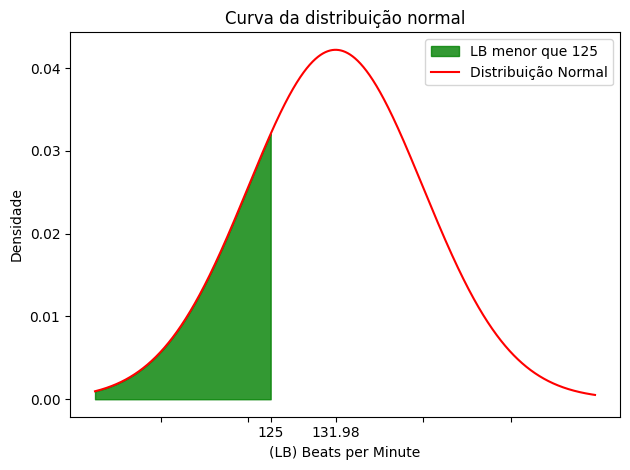

In [10]:
x = np.linspace(min(acc_per_sec_normal), max(acc_per_sec_normal), len(acc_per_sec_normal))
pdf = norm.pdf(x, loc=mean_real, scale=std_real)

x_fill = x[x <= 125]
pdf_fill = pdf[x <= 125]

plt.fill_between(x_fill, pdf_fill, color='g', alpha=0.8, label='LB menor que 125')
plt.plot(x, pdf, 'r-', label='Distribuição Normal')

plt.title('Curva da distribuição normal')
plt.xlabel('(LB) Beats per Minute')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.xticks([mean_real - std_real, mean_real - 2*std_real,
            mean_real, mean_real + std_real, mean_real + 2*std_real, 125],
             ['', '', f'{mean_real:.2f}', '', '', 125])
plt.show()

Formula do Z score: $Z = \frac{X - \mu}{\sigma}$.


In [11]:
# Cálculo do Z-score
z_score = (125 - mean_real) / std_real

# Probabilidade (área sombreada)
percentil = norm.cdf(z_score)

print(f"Z-score: {z_score:.2f}")
print(f"Percentil: {percentil:.4f} ({percentil * 100:.2f}%)")


Z-score: -0.74
Percentil: 0.2300 (23.00%)


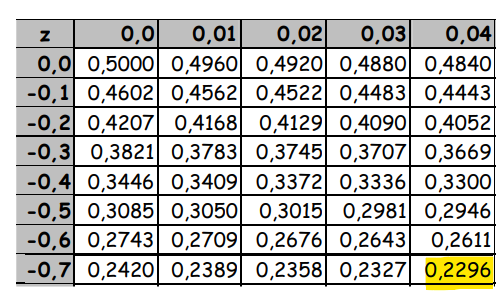

Isso significa que um feto ter o LB menor que 125 tá 0,74 desvios padrões abaixo da média e tem uma probabilidade de 23%

## Versão padronizada

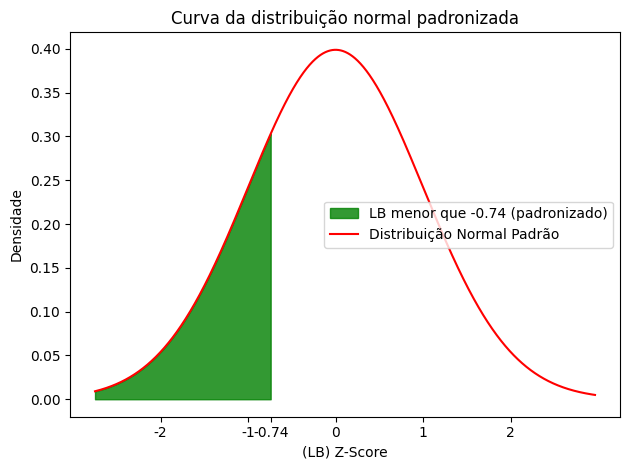

In [12]:
x_padronizado = (x - mean_real) / std_real
pdf_padronizado = norm.pdf(x_padronizado, loc=0, scale=1)

x_fill_padronizado = x_padronizado[x_padronizado <= z_score]
pdf_fill_padronizado = pdf_padronizado[x_padronizado <= z_score]

plt.fill_between(x_fill_padronizado, pdf_fill_padronizado, color='g', alpha=0.8, label=f'LB menor que {z_score:.2f} (padronizado)')
plt.plot(x_padronizado, pdf_padronizado, 'r-', label='Distribuição Normal Padrão')

plt.title('Curva da distribuição normal padronizada')
plt.xlabel('(LB) Z-Score')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.xticks([-2, -1, 0, 1, 2, z_score],
           ['-2', '-1', '0', '1', '2', f'{z_score:.2f}'])
plt.show()

# C
Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

A fórmula da distribuição binomial é $P(X = x) = \binom{n}{x} p^x (1 - p)^{n - x}$.


In [13]:
n = 50 # número de lançamentos (amostras).
x = 48 # número de sucessos desejados.
p = 0.8 # probabilidade de sucesso em uma única tentativa.
q = 0.2 # (1−p): é a probabilidade de fracasso em uma única tentativa.

$P(X = 48) = \binom{50}{48} 0.8^{48} (1 - 0.8)^{2}$.

In [14]:
def fatorial(n):
  resultado = 1
  for i in range(2, n + 1):
    resultado *= i
  return resultado

coef_binominal = fatorial(n) / (fatorial(x) * fatorial(n - x))
prob = coef_binominal * (p ** x) * ((1 - p) ** (n - x))
print(f"{prob:.4f} ({prob*100:.2f}%)")

0.0011 (0.11%)


$P(X = 48) = 0.0011$

Comparando com o exemplo no slide percebe-se que a probabilidade cai de 26,1% para 0,11% apenas diminuindo o s de 0,95 para 0,80.

Na distribuição binomial, quanto mais afasta-se da média esperada, mais improvável se torna o resultado.


*   Para p = 0.95, a média esperada de sucessos é n * p = 47.5, então 48 é perto da média → probabilidade razoável.

*   Para p = 0.8, a média esperada é n * p = 40, então 48 é muito distante da média → probabilidade muito pequena.



In [63]:
# Gerando 10 amostras com tamanho 50 cada uma e com probabilidade de 80% de sucesso
amostras = np.random.binomial(n=n, p=p, size=10)
amostras

array([36, 41, 41, 44, 40, 45, 40, 40, 42, 39])

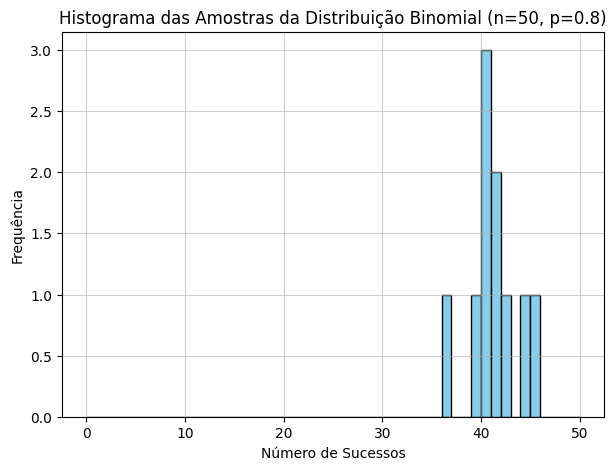

In [66]:
plt.figure(figsize=(7, 5))
plt.hist(amostras, color='skyblue', edgecolor='black', bins=range(n + 1))
plt.title(f'Histograma das Amostras da Distribuição Binomial (n={n}, p={p})')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()